#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

#### Data Preprocessing

In [2]:
df = pd.read_csv('Data/car_data.csv')
df

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0  
2        Dealer       Manual      0  
3        Dealer       Manual      0  
4        Dealer       Manual      0  
..          ...          ...    ...  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  

[301 rows x 9 columns]

In [3]:
#Converting the Year Columns
Age = []
for i in df['Year']:
    Age.append(2019-i)
df.insert(2, 'Age', Age)
df.drop(columns=['Car_Name', 'Year'],inplace=True)

In [4]:
#Converting Categorical Variables
data = {
    'Fuel_Type': df['Fuel_Type'].value_counts(),
    'Seller_Type': df['Seller_Type'].value_counts(),
    'Transmission': df['Transmission'].value_counts(),
    'Owner': df['Owner'].value_counts()
}

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical_attr = ['Fuel_Type', 'Seller_Type', 'Transmission']
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.insert(8, 'Fuel_Type_n', df.Fuel_Type+2)
df.drop(columns=['Fuel_Type'],inplace=True)
df.insert(8, 'Seller_Type_n', df.Seller_Type+2)
df.drop(columns=['Seller_Type'],inplace=True)
df.insert(8, 'Transmission_n', df.Transmission+2)
df.drop(columns=['Transmission'],inplace=True)
df.insert(8, 'Owner_n', df.Owner+2)
df.drop(columns=['Owner'],inplace=True)
df

Age  Selling_Price  Present_Price  Kms_Driven  Fuel_Type_n  \
0      5           3.35           5.59       27000            4   
1      6           4.75           9.54       43000            3   
2      2           7.25           9.85        6900            4   
3      8           2.85           4.15        5200            4   
4      5           4.60           6.87       42450            3   
..   ...            ...            ...         ...          ...   
296    3           9.50          11.60       33988            3   
297    4           4.00           5.90       60000            4   
298   10           3.35          11.00       87934            4   
299    2          11.50          12.50        9000            3   
300    3           5.30           5.90        5464            4   

     Seller_Type_n  Transmission_n  Owner_n  
0                2               3        2  
1                2               3        2  
2                2               3        2  
3                2               3        2  
4                2               3        2  
..             ...             ...      ...  
296              2               3        2  
297              2               3        2  
298              2               3        2  
299              2               3        2  
300              2               3        2  

[301 rows x 8 columns]

In [5]:
df.describe().T

count          mean           std     min      25%      50%  \
Age             301.0      5.372093      2.891554    1.00      3.0      5.0   
Selling_Price   301.0      4.661296      5.082812    0.10      0.9      3.6   
Present_Price   301.0      7.628472      8.644115    0.32      1.2      6.4   
Kms_Driven      301.0  36947.205980  38886.883882  500.00  15000.0  32000.0   
Fuel_Type_n     301.0      3.787375      0.425801    2.00      4.0      4.0   
Seller_Type_n   301.0      2.352159      0.478439    2.00      2.0      2.0   
Transmission_n  301.0      2.867110      0.340021    2.00      3.0      3.0   
Owner_n         301.0      2.043189      0.247915    2.00      2.0      2.0   

                    75%       max  
Age                 7.0      16.0  
Selling_Price       6.0      35.0  
Present_Price       9.9      92.6  
Kms_Driven      48767.0  500000.0  
Fuel_Type_n         4.0       4.0  
Seller_Type_n       3.0       3.0  
Transmission_n      3.0       3.0  
Owner_n             2.0       5.0

 #### Data Visualization


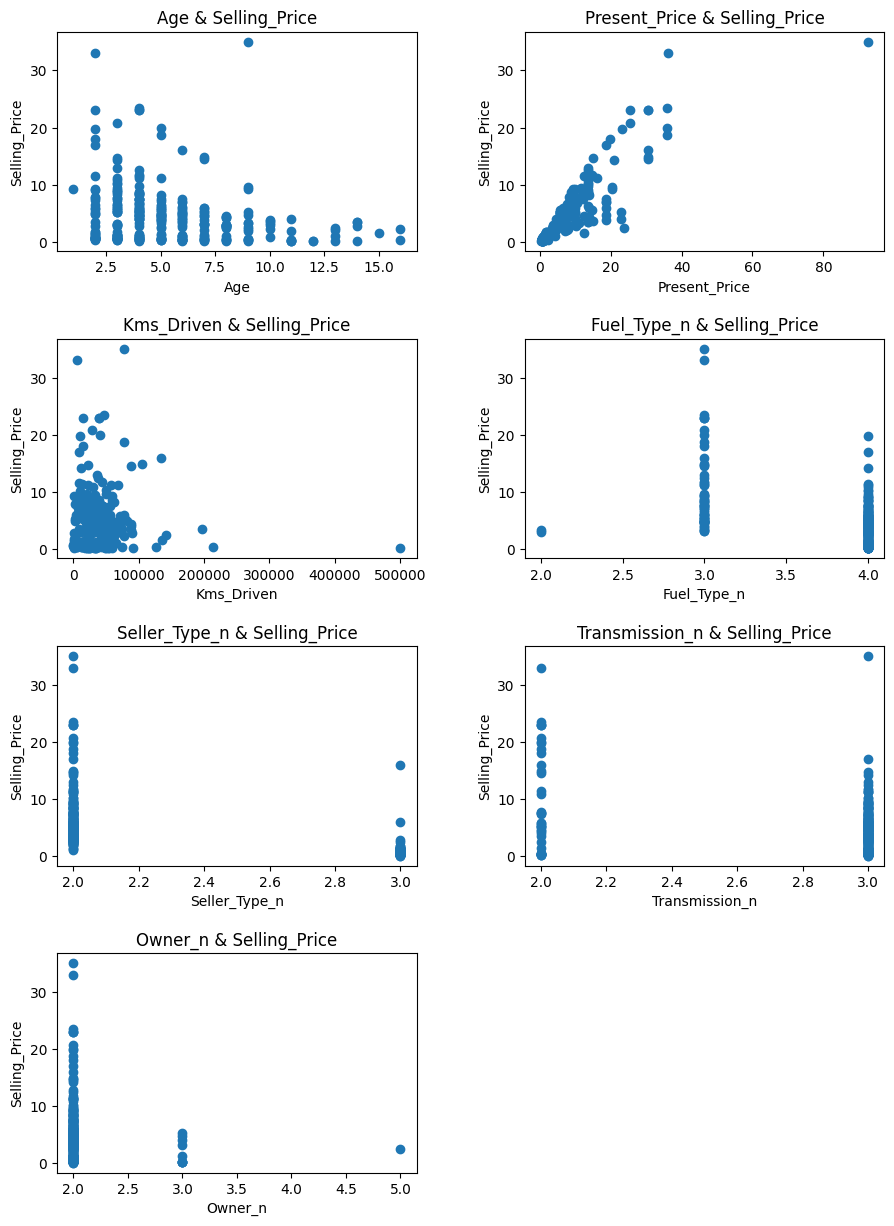

In [6]:
variables = ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type_n', 'Seller_Type_n', 'Transmission_n', 'Owner_n']
num_plots = len(variables)
num_rows = 4
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 12))
fig.tight_layout()
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].scatter(df[var], df['Selling_Price'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Selling_Price')
    axs[row, col].set_title(f'{var} & Selling_Price')
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

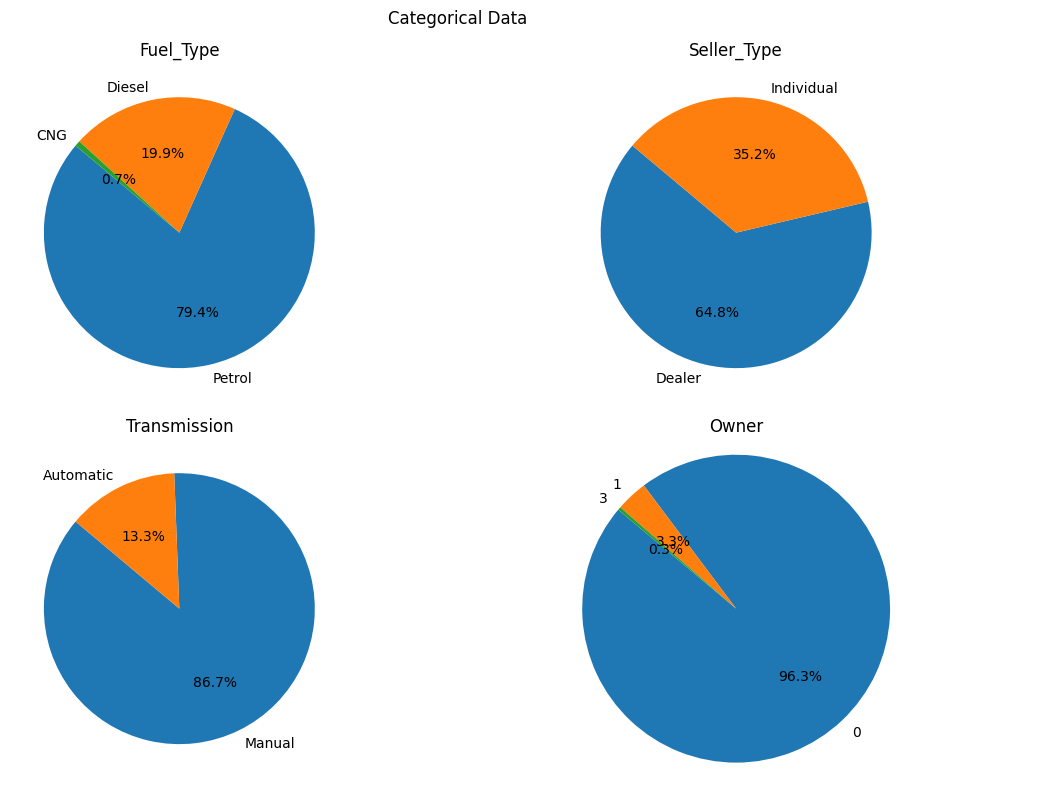

In [7]:
#Pie Charts for Categorical Data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Categorical Data')
for i, (column_name, values_array) in enumerate(data.items()):
    row = i // 2
    col = i % 2
    categories = list(values_array.index)
    values = list(values_array)
    axs[row, col].pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
    axs[row, col].set_title(column_name)
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [8]:
#Find und drop the Missing_Value of the dataset
df.isnull().sum()

Age               0
Selling_Price     0
Present_Price     0
Kms_Driven        0
Fuel_Type_n       0
Seller_Type_n     0
Transmission_n    0
Owner_n           0
dtype: int64

#### Training the Model¶

In [9]:
x = pd.DataFrame(df, columns=['Age','Present_Price','Kms_Driven','Fuel_Type_n','Seller_Type_n','Transmission_n','Owner_n'])
y = df['Selling_Price'].values.reshape(-1,1)

In [10]:
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
results_df = pd.DataFrame(columns=['Test Size', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(y_test, y_pred)
    
    # Create a new DataFrame for the current row
    new_row_df = pd.DataFrame([{
        'Test Size': test_size,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2_score
    }])
    
    # Concatenate the new row to results_df
    results_df = pd.concat([results_df, new_row_df], ignore_index=True)

results_df

Test Size       MAE       MSE      RMSE  R2 Score
0       0.10  1.137708  2.783195  1.668291  0.873552
1       0.15  1.118331  2.553088  1.597838  0.890299
2       0.20  1.000033  2.188556  1.479377  0.913418
3       0.25  1.187585  4.412086  2.100496  0.861975
4       0.30  1.216519  4.416789  2.101616  0.852311

In [11]:
best_row = results_df.loc[results_df['R2 Score'].idxmax()]
optimal_test_size = best_row['Test Size']
print(f"Based on the above results, a test_size of {optimal_test_size} appears to be the optimal choice")

Based on the above results, a test_size of 0.2 appears to be the optimal choice


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (240, 7)
x_test (61, 7)
y_train (240, 1)
y_test (61, 1)


In [13]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(x_test)

In [15]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2 Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error: 1.000032601214668
Mean Squared Error: 2.188556445657867
Root Mean Squared Error: 1.4793770464820206
R2 Score: 0.9134181721224436


#### Improve model accuracy

In [16]:
#intercept__
print(regressor.intercept_)
#slop
print(regressor.coef_)

[17.82019365]
[[-3.92595063e-01  4.36619980e-01 -5.48584299e-06 -1.44377315e+00
  -1.12076998e+00 -1.43830531e+00 -9.89222658e-01]]


In [17]:
# Ranking of features based on weights according to regressor.coef_ method: 
# ----> 1.Owner_n; 
# ----> 2.Seller_Type_n;
# ----> 3.Present_Price; 
# ----> 4.Age; 
# ----> 5.Kms_Driven; 
# ----> 6.Transmission_n; 
# ----> 7.Fuel_Type_n

Feature        ^1        ^2        ^3        ^4        ^5        ^6  \
0             Age  0.913418  0.916010  0.915515  0.915139  0.914916  0.914806   
1   Present_Price  0.913418  0.919880  0.921151  0.921309  0.921256  0.921206   
2      Kms_Driven  0.913418  0.919364 -0.020949 -0.026386 -0.056078 -0.038320   
3     Fuel_Type_n  0.913418  0.914434  0.914434  0.914434  0.914434  0.914434   
4   Seller_Type_n  0.913418  0.913418  0.913418  0.913418  0.913418  0.913418   
5  Transmission_n  0.913418  0.913418  0.913418  0.913418  0.913418  0.913418   
6         Owner_n  0.913418  0.917887  0.917887  0.917887  0.917887  0.917887   

         ^7        ^8        ^9  
0  0.914763  0.914757  0.914765  
1  0.921184 -0.026156 -0.026584  
2 -0.049436 -0.024657 -0.023678  
3  0.914434  0.914434  0.914434  
4  0.913418  0.913418  0.913418  
5  0.913418  0.913418  0.913418  
6  0.917887  0.917887  0.917887

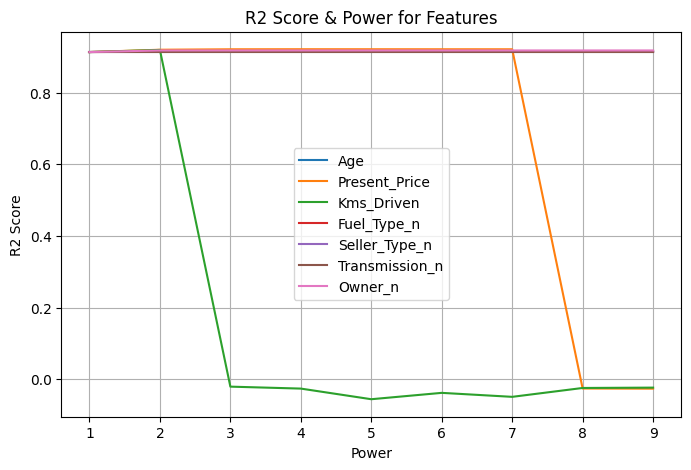

In [18]:
features = ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type_n', 'Seller_Type_n', 'Transmission_n', 'Owner_n']
powers = range(1, 10)
R2_scores = {feature: [] for feature in features}
results_df = pd.DataFrame(columns=['Feature'] + [f'^{power}' for power in powers])

for feature in features:
    for power in powers:
        name_cl = f'{feature}^{power}'
        Val_cl = df[feature] ** power
        df.insert(len(df.columns), name_cl, Val_cl)
        x = pd.DataFrame(df, columns=features + [name_cl])
        y = df['Selling_Price'].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        R2_score = metrics.r2_score(y_test, y_pred)
        R2_scores[feature].append(round(R2_score, 7))

    results_row = [feature] + R2_scores[feature]
    #results_df = results_df.append(pd.Series(results_row, index=results_df.columns), ignore_index=True)
    results_df = pd.concat([results_df, pd.DataFrame([results_row], columns=results_df.columns)], ignore_index=True)


df = df.drop(df.columns[len(features):], axis=1)
fig, ax = plt.subplots(figsize=(8, 5))

for feature in features:
    ax.plot(powers, R2_scores[feature], label=feature)
ax.set_xlabel('Power')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score & Power for Features')
ax.legend()

display(results_df)
plt.grid(True)
plt.show()

In [19]:
# Positive impact on features with increasing feature dimensions:  
# ----> Age: up to ^2  
# ----> Present_Price: up to ^4
# ----> Kms_Driven: up to ^2
# ----> Fuel_Type_n: up to ^2
# ----> Seller_Type_n: no effect
# ----> Transmission_n: no effect
# ----> Owner_n: up to ^2

In [20]:
# Add polynomial features for model training
Owner_n2 = x.Owner_n**2
x.insert(0,'Owner_n2', Owner_n2)

Present_Price2 = x.Present_Price**2
x.insert(0,'Present_Price2', Present_Price2)
Present_Price3 = x.Present_Price**3
x.insert(0,'Present_Price3', Present_Price3)

Age2 = x.Age**2
x.insert(0,'Age2', Age2)

Kms2 = x.Kms_Driven**2
x.insert(0,'Kms2', Kms2)

Fuel_Type_n2 = x.Fuel_Type_n**2
x.insert(0,'Fuel_Type_n2', Fuel_Type_n2)

In [21]:
# Generate diverse interaction features for model refinement
x.insert(0, 'new_f1',x['Age']*x['Present_Price'])
x.insert(0, 'new_f12',x['Age']*x['Present_Price2'])
x.insert(0, 'new_f13',x['Age']*x['Present_Price3'])
x.insert(0, 'new_f14',x['Age']*x['Kms_Driven'])
x.insert(0, 'new_f15',x['Age']*x['Kms2'])
x.insert(0, 'new_f16',x['Age']*x['Fuel_Type_n'])
x.insert(0, 'new_f17',x['Age']*x['Fuel_Type_n2'])
x.insert(0, 'new_f18',x['Age2']*x['Present_Price'])
x.insert(0, 'new_f19',x['Age2']*x['Present_Price2'])
x.insert(0, 'new_f110',x['Age2']*x['Present_Price3'])
x.insert(0, 'new_f111',x['Age2']*x['Kms_Driven'])
x.insert(0, 'new_f112',x['Age2']*x['Kms2'])
x.insert(0, 'new_f113',x['Age2']*x['Fuel_Type_n'])
x.insert(0, 'new_f114',x['Age2']*x['Fuel_Type_n2'])
x

new_f114  new_f113      new_f112  new_f111       new_f110     new_f19  \
0         400       100   18225000000    675000    4366.921975    781.2025   
1         324       108   66564000000   1548000   31257.023904   3276.4176   
2          64        16     190440000     27600    3822.686500    388.0900   
3        1024       256    1730560000    332800    4574.296000   1102.2400   
4         225        75   45050062500   1061250    8106.067575   1179.9225   
..        ...       ...           ...       ...            ...         ...   
296        81        27   10396657296    305892   14048.064000   1211.0400   
297       256        64   57600000000    960000    3286.064000    556.9600   
298      1600       400  773238835600   8793400  133100.000000  12100.0000   
299        36        12     324000000     36000    7812.500000    625.0000   
300       144        36     268697664     49176    1848.411000    313.2900   

     new_f18  new_f17  new_f16      new_f15  ...  Present_Price2  Owner_n2  \
0     139.75       80       20   3645000000  ...         31.2481         4   
1     343.44       54       18  11094000000  ...         91.0116         4   
2      39.40       32        8     95220000  ...         97.0225         4   
3     265.60      128       32    216320000  ...         17.2225         4   
4     171.75       45       15   9010012500  ...         47.1969         4   
..       ...      ...      ...          ...  ...             ...       ...   
296   104.40       27        9   3465552432  ...        134.5600         4   
297    94.40       64       16  14400000000  ...         34.8100         4   
298  1100.00      160       40  77323883560  ...        121.0000         4   
299    50.00       18        6    162000000  ...        156.2500         4   
300    53.10       48       12     89565888  ...         34.8100         4   

     Age  Present_Price  Kms_Driven  Fuel_Type_n  Seller_Type_n  \
0      5           5.59       27000            4              2   
1      6           9.54       43000            3              2   
2      2           9.85        6900            4              2   
3      8           4.15        5200            4              2   
4      5           6.87       42450            3              2   
..   ...            ...         ...          ...            ...   
296    3          11.60       33988            3              2   
297    4           5.90       60000            4              2   
298   10          11.00       87934            4              2   
299    2          12.50        9000            3              2   
300    3           5.90        5464            4              2   

     Transmission_n  Owner_n  Owner_n^9  
0                 3        2        512  
1                 3        2        512  
2                 3        2        512  
3                 3        2        512  
4                 3        2        512  
..              ...      ...        ...  
296               3        2        512  
297               3        2        512  
298               3        2        512  
299               3        2        512  
300               3        2        512  

[301 rows x 28 columns]